In [17]:
# Libraries Using
import pandas as pd
import numpy as np

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Importing and Exploring the Dataset
data = pd.read_csv('/kaggle/input/tripadvisor-reviews-2023/New_Delhi_reviews.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [19]:
# Checking for NULL values
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [20]:
data.dropna(inplace = True)
data.isnull().sum()
data.drop_duplicates(inplace = True)

In [21]:

data['review_full'] = data['review_full'].str.lower()
data['review_full']

0         totally in love with the auro of the place, re...
1         i went this bar 8 days regularly with my husba...
2         we were few friends and was a birthday celebra...
3         fatjar cafe and market is the perfect place fo...
4         hey guys, if you are craving for pizza and sea...
                                ...                        
147576    near by airport very calm and cool environment...
147577    my favourite place to stay. great service. ash...
147578    good food with nice decoration, drinks list al...
147579    near to airport .it is fine property.  staff i...
147580    amazing food ..  excellent ambience ..  great ...
Name: review_full, Length: 147442, dtype: object

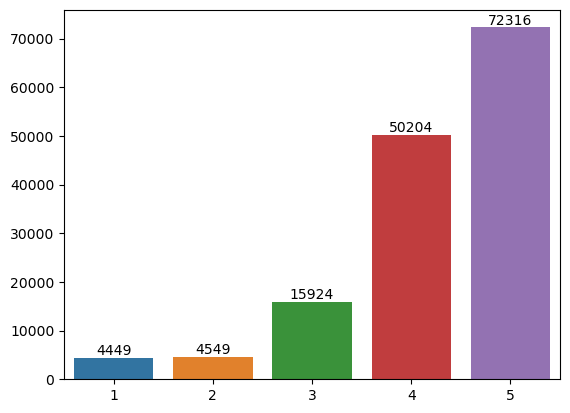

In [22]:
# Distribution of Ratings from 5 to 1
ax = sns.barplot(data, x = data['rating_review'].value_counts().index, y = data['rating_review'].value_counts().values)
for labels in ax.containers:
    ax.bar_label(labels)

In [23]:
one_rating  = (data['rating_review'].value_counts().values[4] * 100 / data['rating_review'].count()).round(2)
two_rating  = (data['rating_review'].value_counts().values[3] * 100 / data['rating_review'].count()).round(2)
three_rating  = (data['rating_review'].value_counts().values[2] * 100 / data['rating_review'].count()).round(2)
four_rating  = (data['rating_review'].value_counts().values[1] * 100 / data['rating_review'].count()).round(2)
five_rating  = (data['rating_review'].value_counts().values[0] * 100 / data['rating_review'].count()).round(2)

print('1 Star: ', one_rating,'%')
print('2 Star: ', two_rating,'%')
print('3 Star: ', three_rating,'%')
print('4 Star: ', four_rating,'%')
print('5 Star: ', five_rating,'%')

1 Star:  3.02 %
2 Star:  3.09 %
3 Star:  10.8 %
4 Star:  34.05 %
5 Star:  49.05 %


In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= 0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
data['sentiment'] = data['review_full'].apply(get_sentiment)

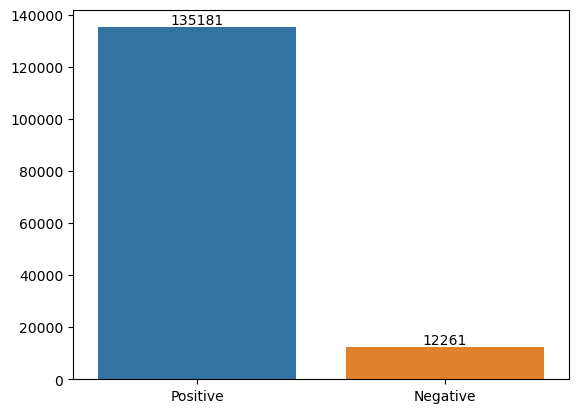

In [28]:
# Plotting the Sentiment Distribution
ax = sns.barplot(data, x = data['sentiment'].value_counts().index, y = data['sentiment'].value_counts().values)

for labels in ax.containers:
    ax.bar_label(labels)

In [29]:
positive_review = (data['sentiment'].value_counts().values[0] / data['sentiment'].count()).round(3) * 100
negative_review = (data['sentiment'].value_counts().values[1] / data['sentiment'].count()).round(3) * 100

print('Positive Review Percentage:', positive_review,'%')
print('Negative Review Percentage:', negative_review,'%')

Positive Review Percentage: 91.7 %
Negative Review Percentage: 8.3 %


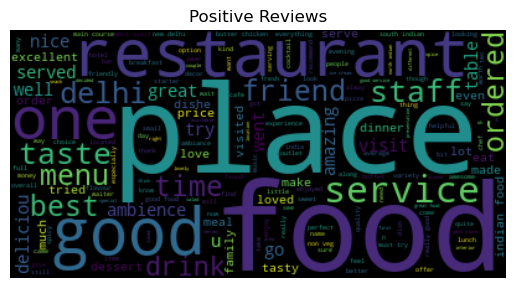

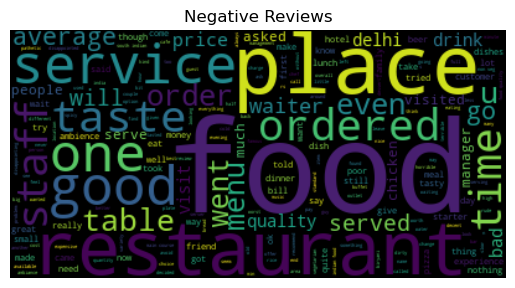

In [30]:
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['review_full'])
negative_reviews = ' '.join(data[data['sentiment'] == 'Negative']['review_full'])

positive_wordcloud = WordCloud().generate(positive_reviews)
negative_wordcloud = WordCloud().generate(negative_reviews)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews')
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews')
plt.show()